# Problem Statement:

Fashion MNIST is a dataset of Zalando's article images, consisting of 60,000 training examples and 10,000 test examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. The task is to classify these images into an
apparel category amongst 10 categories on which the dataset is benchmarked.

# Objectives:

### Data Preparation and Visualization:

● Load the Fashion MNIST dataset.

● Visualize different samples from the dataset.

● Normalize the pixel values of the images to be between 0 and 1 for better model performance.

● Convert the output labels to categorical format for classification.

### Model Building and Training:

● Construct a Neural Network using TensorFlow and Keras.

● The model should consist of multiple dense layers with a significant number of neurons.

● Utilize ReLU activation for hidden layers and softmax activation for the output layer.

● Train the model on the prepared dataset.

● Implement callbacks, particularly TensorBoard, to visualize the training process.

### Model Evaluation and Analysis:

● Evaluate the model's performance using a validation set.

● Analyze the training process with the help of TensorBoard.

● Save the trained model, including its architecture and learned weights.

### Model Loading and Verification:

● Load the saved model and verify its architecture.

● Check the consistency in the number of model parameters and weights

# 1. Load Libraries

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import TensorBoard

import datetime

import warnings
warnings.filterwarnings("ignore")

C:\Users\raman\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


# 2. Load Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Train images shape:", x_train.shape)
print("Train labels shape:", y_train.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


# 3. Sample Visualization

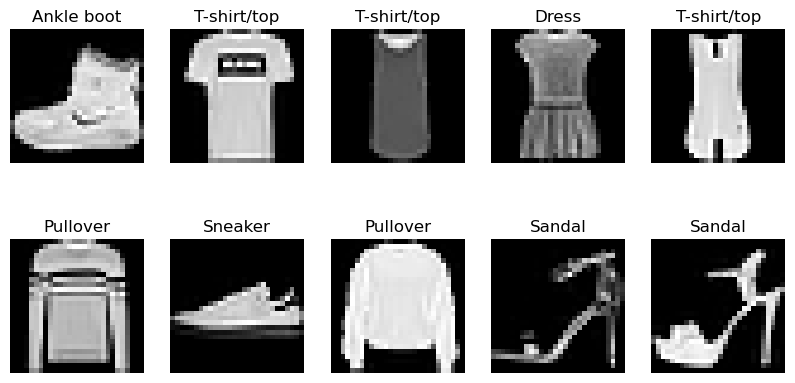

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

# 4. Data Preprocessing

In [4]:
#Normalize Pixel Values
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images for dense network: 28x28 -> 784
x_train_flat = x_train.reshape((x_train.shape[0], 28 * 28))
x_test_flat = x_test.reshape((x_test.shape[0], 28 * 28))

# Convert Labels to Categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 5 Model Building

In [5]:
# Build Neural Network Model
model = keras.Sequential([
    layers.Flatten(input_shape=(28 * 28,)),  # Use Flatten instead of Input
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
#Compile the Model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

# 6. TensorBoard Callback

In [7]:
log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_cb = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

print("TensorBoard log directory:", log_dir)

TensorBoard log directory: logs\20251223-014211


# 7. Train the Model

In [8]:
# 7. Train
history = model.fit(
    x_train_flat,
    y_train_cat,
    epochs=15,
    batch_size=128,
    validation_split=0.2,
    callbacks=[tensorboard_cb]
)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8068 - loss: 0.5568 - val_accuracy: 0.8497 - val_loss: 0.4242
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8616 - loss: 0.3834 - val_accuracy: 0.8586 - val_loss: 0.3874
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8744 - loss: 0.3437 - val_accuracy: 0.8715 - val_loss: 0.3566
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8811 - loss: 0.3210 - val_accuracy: 0.8717 - val_loss: 0.3534
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8903 - loss: 0.2983 - val_accuracy: 0.8691 - val_loss: 0.3514
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8920 - loss: 0.2897 - val_accuracy: 0.8796 - val_loss: 0.3258
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8997 - loss: 0.2699 - val_accuracy: 0.8879 - val_loss: 0.3101
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9034 - loss: 0.2574 - val_accu

# 8. Evaluation

In [9]:
test_loss, test_acc = model.evaluate(x_test_flat, y_test_cat, verbose=2)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8871 - loss: 0.3427
Test loss: 0.34274864196777344
Test accuracy: 0.8870999813079834


# 9. Model Saving

In [10]:
model.save("fashion_mnist_model.keras")

# 10. Load Saved Model

In [11]:
loaded_model = tf.keras.models.load_model("fashion_mnist_model.keras")

# Verify architecture
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 728,288 (2.78 MB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,526 (1.85 MB)

# 11. Verify Parameters

In [12]:
print("Original Params:", model.count_params())
print("Loaded Params:", loaded_model.count_params())
print("Same parameter count?", model.count_params() == loaded_model.count_params())

Original Params: 242762
Loaded Params: 242762
Same parameter count? True


# 12. Weights Consistency

In [13]:
for w1, w2 in zip(model.get_weights(), loaded_model.get_weights()):
    print(np.allclose(w1, w2))

True
True
True
True
True
True
True
True


# 13. Evaluate Loaded Model

In [14]:
loaded_loss, loaded_acc = loaded_model.evaluate(x_test_flat, y_test_cat, verbose=2)
print("Loaded model test loss:", loaded_loss)
print("Loaded model test accuracy:", loaded_acc)

313/313 - 1s - 4ms/step - accuracy: 0.8871 - loss: 0.3427
Loaded model test loss: 0.34274864196777344
Loaded model test accuracy: 0.8870999813079834
